In [1]:
#importing library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# import dataset
data = pd.read_excel("D:/DATA SCIENCE/1. Data Scientist/Assignment/17.Forecasting/Airlines+Data.xlsx")
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
data.shape

(96, 2)

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [7]:
data.nunique()

Month         96
Passengers    80
dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


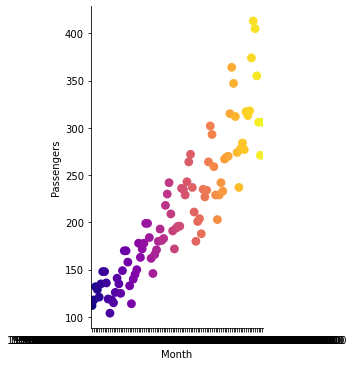

In [8]:
#from seaborn library
sns.factorplot(data = data, x = 'Month', y = "Passengers", palette = 'plasma')

In [9]:
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(data['Passengers'])

In [10]:
def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(data['Passengers'])

ADF Test Statistic : 1.3402479596467125
p-value : 0.9968250481137263
#Lags Used : 12
Number of Observations Used : 83
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
data['Passengers Difference'] = data['Passengers'] - data['Passengers'].shift(1)

In [13]:
data['Seasonal Passengers Difference']=data['Passengers'] - data['Passengers'].shift(12)

In [14]:
data.head()

,Month,Passengers,Passengers Difference,Seasonal Passengers Difference
0,1995-01-01,112,NaN,NaN
1,1995-02-01,118,6.0,NaN
2,1995-03-01,132,14.0,NaN
3,1995-04-01,129,-3.0,NaN
4,1995-05-01,121,-8.0,NaN


In [15]:
adfuller_test(data['Seasonal Passengers Difference'].dropna())

ADF Test Statistic : -2.690004383862316
p-value : 0.0757839762585176
#Lags Used : 1
Number of Observations Used : 82
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:>

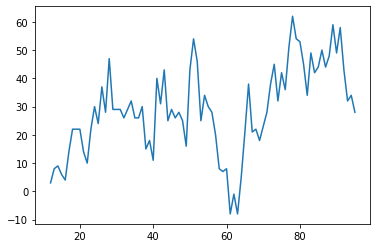

In [16]:
data['Seasonal Passengers Difference'].plot()

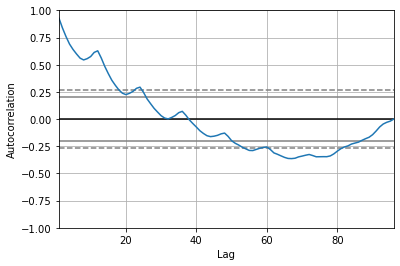

In [17]:
# from matplotlib and seaborn
pd.plotting.autocorrelation_plot(data['Passengers'])
plt.show()

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

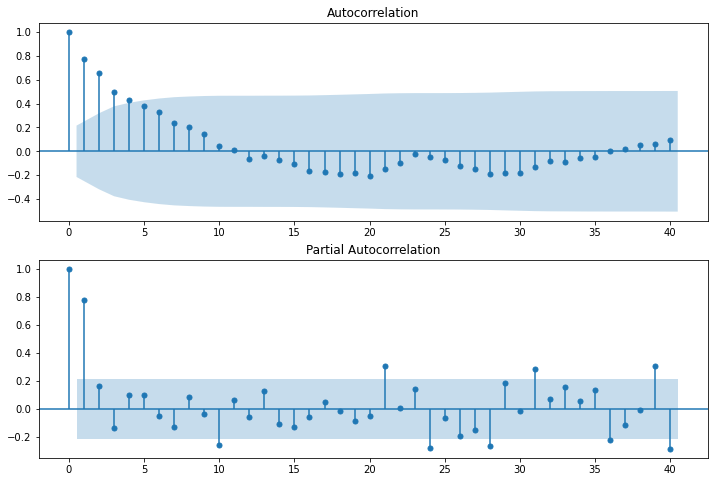

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal Passengers Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal Passengers Difference'].iloc[13:],lags=40,ax=ax2)

In [20]:
# ARIMA

In [21]:
# For non-seasonal data
# p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [22]:
model=ARIMA(data['Passengers'],order=(1,1,1))
model_fit=model.fit()

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIM

<AxesSubplot:>

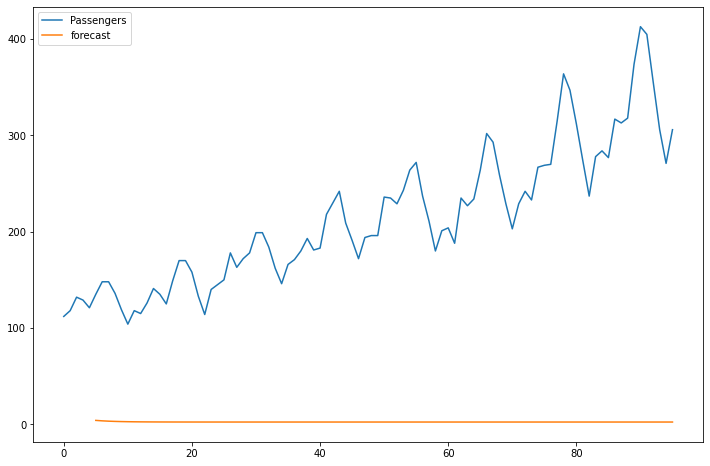

In [23]:
data['forecast']=model_fit.predict(start=5,end=200,dynamic=True)
data[['Passengers','forecast']].plot(figsize=(12,8))

In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   95
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -427.813
Method:                       css-mle   S.D. of innovations             21.536
Date:                Mon, 28 Jun 2021   AIC                            863.627
Time:                        20:11:50   BIC                            873.842
Sample:                             1   HQIC                           867.755
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.2914      0.266      8.601      0.000       1.769       2.814
ar.L1.D.Passengers     0.7248      0.073      9.898      0.000       0.581       0.868
ma.L1.D.Passengers    -1.0000      0.028    -36.363      0.000      -1.054      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3797           +0.0000j            1.3797            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
# SARIMAX

<AxesSubplot:>

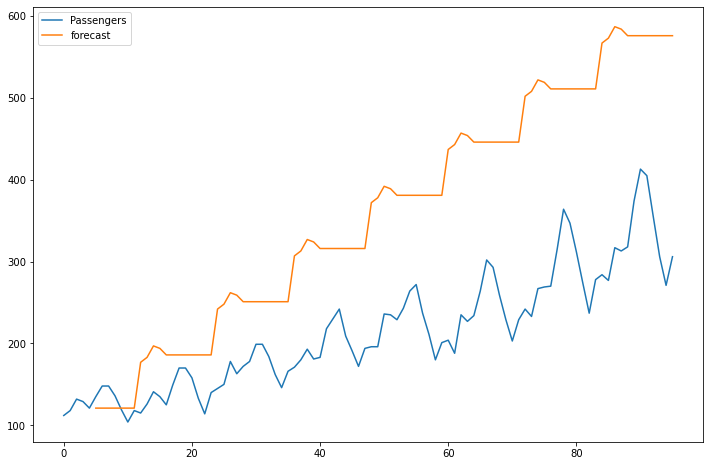

In [26]:
model_sa=sm.tsa.statespace.SARIMAX(data['Passengers'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model_sa.fit()
data['forecast']=results.predict(start=5,end=200,dynamic=True)
data[['Passengers','forecast']].plot(figsize=(12,8))

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -304.667
Date:                            Mon, 28 Jun 2021   AIC                            619.334
Time:                                    20:02:38   BIC                            631.428
Sample:                                         0   HQIC                           624.192
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6043      0.352     -1.717      0.086      -1.294       0.086
ma.L1          0.4003      0.391      1.023      0.306      -0.367       1.167
ar.S.L12      -0.3731      0.428     -0.872      0.383      -1.211       0.465
ma.S.L12       0.1537      0.481      0.319      0.749      -0.789       1.097
sigma2        89.5287     15.197      5.891      0.000      59.742     119.315
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.88
Prob(Q):                              0.89   Prob(JB):                         0.39
Heteroskedasticity (H):               1.81   Skew:                             0.34
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# AR

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


                            AutoReg Model Results                             
Dep. Variable:             Passengers   No. Observations:                   96
Model:                     AutoReg(1)   Log Likelihood                -432.298
Method:               Conditional MLE   S.D. of innovations             22.910
Date:                Mon, 28 Jun 2021   AIC                              6.326
Time:                        20:02:48   BIC                              6.407
Sample:                             1   HQIC                             6.359
                                   96                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        13.7578      7.398      1.860      0.063      -0.742      28.257
Passengers.L1     0.9449      0.033     28.658      0.000       0.880       1.010
                                    Root

<AxesSubplot:>

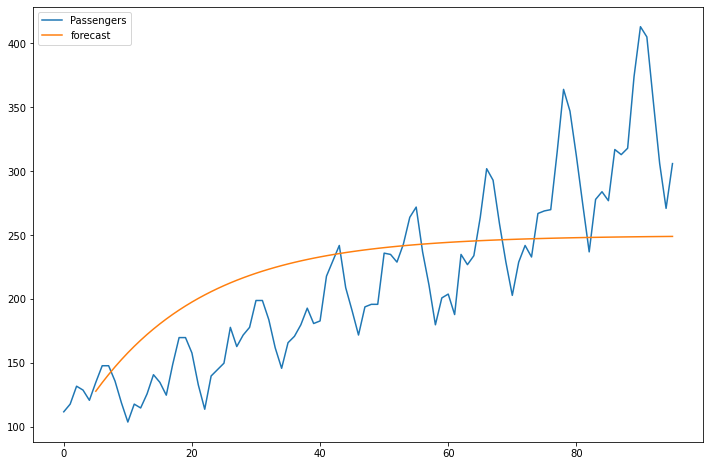

In [29]:
from statsmodels.tsa.ar_model import AutoReg
model_ar=AutoReg(data['Passengers'],lags=1)
model_ar_fit=model_ar.fit()
print(model_ar_fit.summary())
data['forecast']=model_ar_fit.predict(start=5,end=200,dynamic=True)
data[['Passengers','forecast']].plot(figsize=(12,8))

In [30]:
# MA

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                   96
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -490.947
Date:                Mon, 28 Jun 2021   AIC                            987.893
Time:                        20:03:55   BIC                            995.586
Sample:                             0   HQIC                           991.003
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        213.7922      8.437     25.341      0.000     197.257     230.328
ma.L1          0.9625      0.051     18.882      0.000       0.863       1.062
sigma2      1576.7124    281.255      5.606      0.0

<AxesSubplot:>

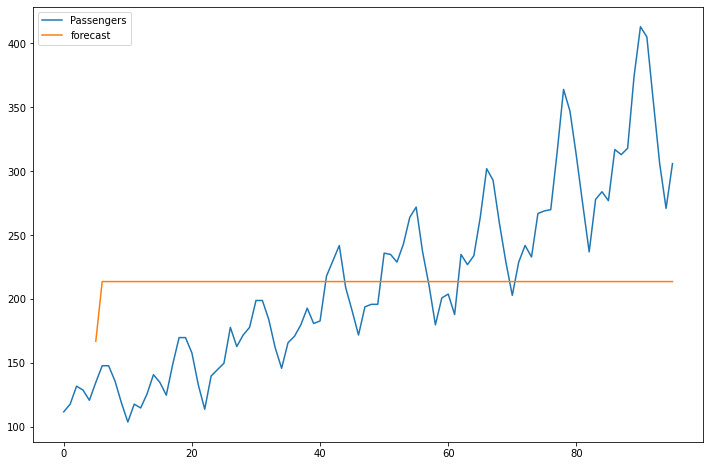

In [31]:
from statsmodels.tsa.arima.model import ARIMA
model_ma=ARIMA(data['Passengers'],order=(0, 0, 1))
model_ma_fit=model_ma.fit()
print(model_ma_fit.summary())
data['forecast']=model_ma_fit.predict(start=5,end=200,dynamic=True)
data[['Passengers','forecast']].plot(figsize=(12,8))

In [32]:
# ARMA

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                   96
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -431.881
Date:                Mon, 28 Jun 2021   AIC                            873.762
Time:                        20:04:27   BIC                            886.584
Sample:                             0   HQIC                           878.945
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        213.7099     37.857      5.645      0.000     139.511     287.908
ar.L1          0.5038      0.170      2.960      0.003       0.170       0.837
ar.L2          0.4053      0.173      2.347      0.0

<AxesSubplot:>

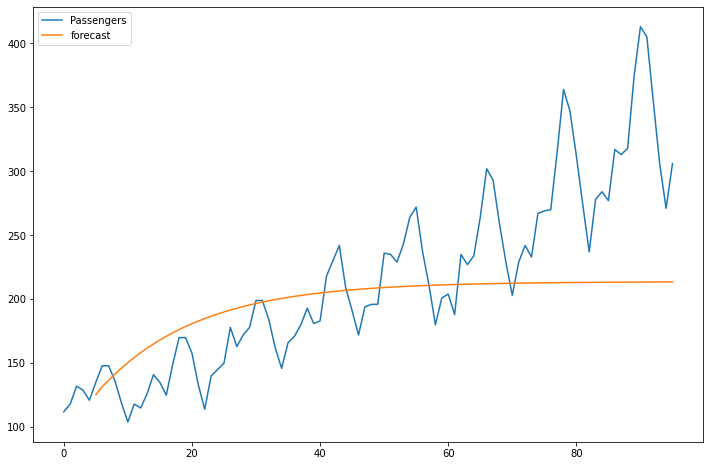

In [33]:
from statsmodels.tsa.arima.model import ARIMA
model_ari=ARIMA(data['Passengers'],order=(2, 0, 1))
model_ari_fit=model_ari.fit()
print(model_ari_fit.summary())
data['forecast']=model_ari_fit.predict(start=5,end=200,dynamic=True)
data[['Passengers','forecast']].plot(figsize=(12,8))

In [34]:
# SES

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


                       SimpleExpSmoothing Model Results                       
Dep. Variable:             Passengers   No. Observations:                   96
Model:             SimpleExpSmoothing   SSE                          51722.000
Optimized:                       True   AIC                            607.772
Trend:                           None   BIC                            612.901
Seasonal:                        None   AICC                           608.211
Seasonal Periods:                None   Date:                 Mon, 28 Jun 2021
Box-Cox:                        False   Time:                         20:04:44
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level              111.99999                

<AxesSubplot:>

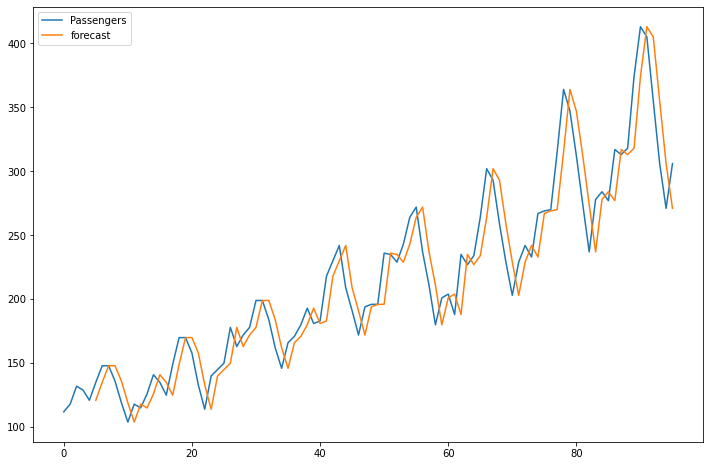

In [35]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_smo=SimpleExpSmoothing(data['Passengers'])
model_smo_fit=model_smo.fit()
print(model_smo_fit.summary())
data['forecast']=model_smo_fit.predict(start=5,end=200)
data[['Passengers','forecast']].plot(figsize=(12,8))

In [36]:
# HWES

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Passengers   No. Observations:                   96
Model:             ExponentialSmoothing   SSE                          51722.000
Optimized:                         True   AIC                            607.772
Trend:                             None   BIC                            612.901
Seasonal:                          None   AICC                           608.211
Seasonal Periods:                  None   Date:                 Mon, 28 Jun 2021
Box-Cox:                          False   Time:                         20:04:51
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level              111.999

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

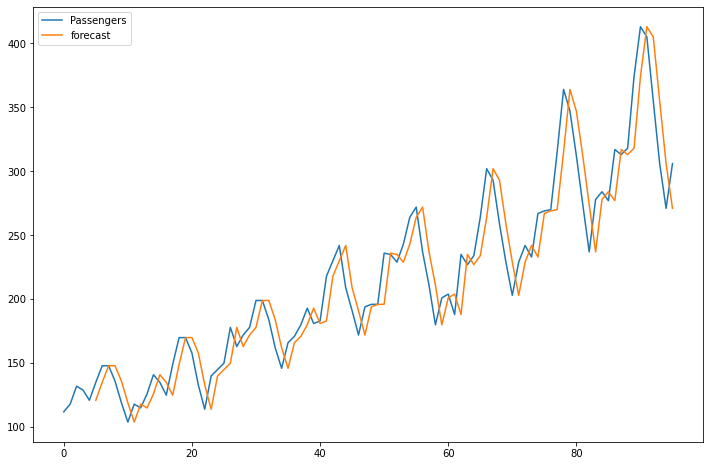

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_esmo=ExponentialSmoothing(data['Passengers'])
model_esmo_fit=model_esmo.fit()
print(model_esmo_fit.summary())
data['forecast']=model_esmo_fit.predict(start=5,end=200)
data[['Passengers','forecast']].plot(figsize=(12,8))